## Lichtquellen und Gitterspektroskopie

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2

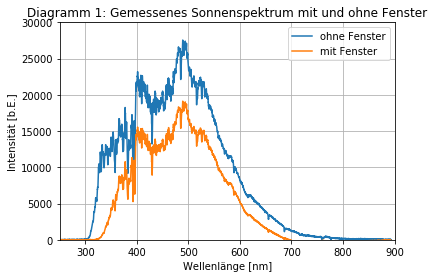

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

plt.figure(1)
lamb_og, inten_og=np.loadtxt('./himmel_o_g.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
lamb_mg, inten_mg=np.loadtxt('./himmel_m_g.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb_og,inten_og, label = 'ohne Fenster')
plt.plot(lamb_mg,inten_mg, label = 'mit Fenster')
plt.title('Diagramm 1: Gemessenes Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [b.E.]')
plt.legend()
plt.grid()
plt.ylim((0,30000))
plt.xlim((250,900))
plt.show()

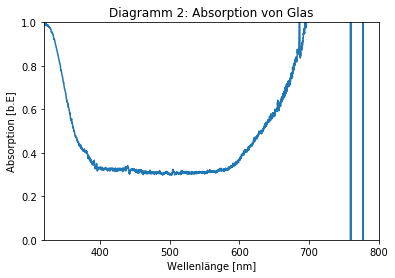

In [3]:
A = 1-inten_mg/inten_og
plt.plot(lamb_og, A)
plt.title('Diagramm 2: Absorption von Glas')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Absorption [b.E]')
plt.ylim((0,1))
plt.xlim((320,800))
plt.show()

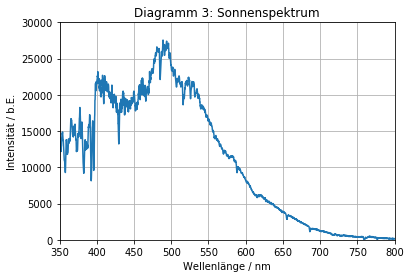

In [4]:
plt.plot(lamb_og, inten_og)
plt.title('Diagramm 3: Sonnenspektrum')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.ylim((0,30000))
plt.xlim((350,800))
plt.grid()
plt.show()

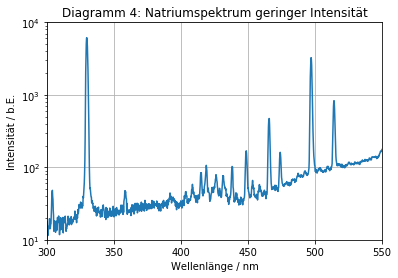

In [5]:
lamb, inten=np.loadtxt('./Natrium_klein.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb, inten)
plt.title('Diagramm 4: Natriumspektrum geringer Intensität')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.yscale('log')
plt.ylim((10,10000))
plt.xlim((300,550))
plt.grid()
plt.show()

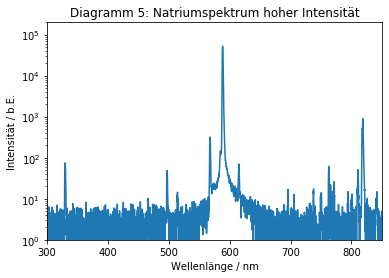

In [6]:
lamb, inten=np.loadtxt('./Natrium_gro__2.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)
plt.plot(lamb, inten)
plt.title('Diagramm 5: Natriumspektrum hoher Intensität')
plt.xlabel('Wellenlänge / nm')
plt.ylabel('Intensität / b.E.')
plt.yscale('log')
plt.ylim((1,200000))
plt.xlim((300,850))
plt.show()

E_Ry =  -12.918629546250036 Standardfehler =  0.3475730153757146
E_3p =  -3.011531835607996 Standardfehler =  0.0052659109899900365
D_d =  0.06364137736616086 Standardfehler =  0.036343087610507675
chi2 =  7.256086661143257
chi2_red =  1.036583808734751
Wahrscheinlichkeit:  40.0 %


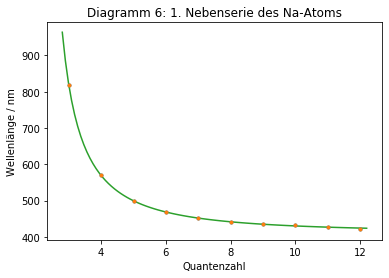

In [7]:
wellenl=np.array([819.,569.9,499.5,468.3,451.3,441,434.8,431.6,428.3,421.4])
fehler=np.array([2,1,1,1,1,1,1,1,1,2])
quantenz=np.arange(3,13)
plt.errorbar(quantenz,wellenl,fehler,fmt='.')
plt.xlabel('Wellenlänge / nm')
plt.title('Diagramm 6: 1. Nebenserie des Na-Atoms')
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)
para=[-13.6,-3,-0.02]
popt, pcov=curve_fit(fit_func, quantenz, wellenl, sigma=fehler, p0=para)
print("E_Ry = ", popt[0], "Standardfehler = ", np.sqrt(pcov[0][0]))
print("E_3p = ", popt[1], "Standardfehler = ", np.sqrt(pcov[1][1]))
print("D_d = ", popt[2], "Standardfehler = ", np.sqrt(pcov[2][2]))

chi2_=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2)
dof=len(quantenz)-3
chi2_red=chi2_/dof
print("chi2 = ", chi2_)
print("chi2_red = ", chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit: ", prob, "%")

plt.errorbar(quantenz,wellenl,fehler,fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge / nm')
plt.title('Diagramm 6: 1. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2,100)
plt.plot(x, fit_func(x,*popt))
plt.show()